# Credit-Card-Fraud-Detection-Heuristics

Data Analysis and Evaluation 

In [32]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.metrics import classification_report
import seaborn as sns


Load and Review Data

In [33]:

data = pd.read_csv('../../data/creditcard.csv')
start_date = pd.Timestamp('2020-07-06')  # Adjust this to your desired start date
data['Time'] = start_date + pd.to_timedelta(data['Time'], unit='s')
data.set_index('Time', inplace=True)


In [34]:
data_df = data.copy()
data_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
2020-07-06 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2020-07-06 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2020-07-06 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2020-07-06 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2020-07-06 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
# Check for missing values
print(data_df.isna().sum())

# we don't have missing data 

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [36]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284807 entries, 2020-07-06 00:00:00 to 2020-07-07 23:59:52
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807

Class nomalies

In [37]:
data_df['Class'].unique() #target variable 1: Fruad 0 : non fruad

array([0, 1], dtype=int64)

In [38]:
# count the occurrences of each class
class_counts = data_df["Class"].value_counts()
print(class_counts)
print('No Frauds', round(data_df['Class'].value_counts()[0]/len(data_df) * 100,2), '% of the dataset')
print('Frauds', round(data_df['Class'].value_counts()[1]/len(data_df) * 100,2), '% of the dataset')

#from the result below we can realise that out data imbalanced so we to balanched it


Class
0    284315
1       492
Name: count, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

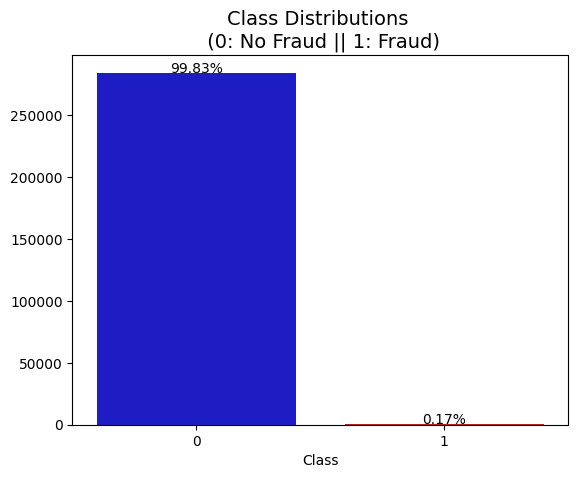

In [42]:
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

# Plotting the countplot
ax = sns.countplot(x='Class', data=data_df, palette=colors)
total = float(len(data_df))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100)+'%',
            ha="center") 

ax.set_ylabel('') 

plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


Testing "Vs" for Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

#empty DataFrame to store the results
results = pd.DataFrame(columns=['V', 'ADF Statistic', 'p-value', 'Stationary'])
# looping over each column from V1 to V5
for i in range(1, 6):
    column = 'V'+str(i)
    result = adfuller(data_df[column])

    # check if the p-value is less than 0.05
    is_stationary = result[1] < 0.05
    results.loc[i] = [column, result[0], result[1], is_stationary]

print(results)


    V  ADF Statistic       p-value  Stationary
1  V1     -33.889766  0.000000e+00        True
2  V2     -39.037918  0.000000e+00        True
3  V3     -12.697765  1.096613e-23        True
4  V4     -33.857356  0.000000e+00        True
5  V5     -25.127779  0.000000e+00        True


V1 to V5 are stationary, after testing them with adfuller 

# Naive Approach

In [ ]:
import numpy as np
from sklearn.metrics import  f1_score , confusion_matrix,classification_report, accuracy_score,recall_score,precision_score
plt.rcParams['figure.figsize'] = (18, 5)

Vs = ['V1','V2','V3','V4','V5']      
results_df = pd.DataFrame(columns=['Vs','Method','Accuracy','F1','Recall','Precision','FNR','FPR'])


In [ ]:
def asses_method(y_true, y_pred):
    
    #classification report
    print(classification_report(y_true, y_pred))
    
    # F1 score
    F1_score = f1_score(y_true, y_pred)*100
    print('F1-score: {:.2f}%'.format(F1_score))
    
    # confusion matrix
    print('Confusion matrix:')
    cnf_matrix=confusion_matrix(y_true, y_pred)
    
    print(cnf_matrix)
    TP = cnf_matrix[0][0]
    FP = cnf_matrix[0][1]
    FN = cnf_matrix[1][0]
    TN = cnf_matrix[1][1]
    
    #False positive rate
    FPR = round(FP/(FP+TN)*100, 2)
    print('False Positive Rate:', FPR)

    # False negative rate
    FNR = round(FN/(TP+FN)*100, 2)
    print('False Negative Rate:', FNR)   
    
    #accuracy part
    ACC = round((TP+TN)/(TP+FP+FN+TN)*100, 2)
    
    F1 = round(f1_score(y_true, y_pred)*100, 2)
    Recall = round(recall_score(y_true, y_pred)*100, 2)
    Precision = round(precision_score(y_true, y_pred)*100, 2)

    return {'Accuracy':ACC, 'F1':F1,'Precision':Precision,'Recall':Recall,'FPR':FPR,'FNR':FNR}


        

In [ ]:
def plot_Vs(Vs,data):
    plt.rcParams['figure.figsize'] = (18, 5)
    data[[Vs]].plot()
    plt.title(Vs)
    plt.legend(loc='best')
    plt.show()

In [ ]:
def plot_cutoff(Vs,data,cutoff,lower_cutoff):
    plt.rcParams['figure.figsize'] = (18, 5)
    plt.plot(data[Vs])
    plt.fill_between(data.index, y1=cutoff,y2=lower_cutoff, alpha=0.2, color='green', linestyle='--', linewidth=2)

In [ ]:
def plot_Vs_reel_anomalies(Vs,data):
    fig=plt.figure(figsize=(18,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data[[Vs]])
    outliers= data[data['Class']== 1][Vs]
    outliers.plot(marker='.', linestyle='none', c="orange")
    ax.set_title(Vs + " Reel Anomalies")
    ax.legend(loc='best',labels=[Vs,'Reel Anomalies'])
    plt.show()

In [ ]:
def plot_outliers(Vs,data,upper_outliers,lower_outliers):
    fig=plt.figure(figsize=(18,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data[[Vs]])
    upper_outliers.plot(marker='.', linestyle='none', c="g")
    lower_outliers.plot(marker='.', linestyle='none', c="r")
    ax.legend(loc='best', labels=[Vs,'Upper outliers', 'Lower outliers'])
    ax.set_title(Vs + ' Cutoff Detected Anamolies')
    plt.show()
    

# 1 - Compute the Global Mean & Global standard deviation of the CreditCard data

In [ ]:
def apply_cutoff_method(Vs,data,upper_cutoff_threshold = 1, lower_cutoff_threshold =1):
    
    #plot original data
    plot_Vs(Vs,data)
    
    # Get Mean and STD
    mean = data[Vs].mean()
    std =  data[Vs].std()
    print(f"mean = {mean:.2f}, standard deviation = {std:.2f}")
    
    # Apply Cutoff
    cutoff = mean + upper_cutoff_threshold * std
    lower_cutoff=cutoff / lower_cutoff_threshold
    print(f"Cutoff value = {cutoff:.2f} , Lower cutoff value = {lower_cutoff:.2f}")
    
    # plot Vs data with cutoff
    plot_cutoff(Vs,data,cutoff,lower_cutoff)
    
    new_data=data.copy()
    new_data['cutoff_status'] = 0
    mask = (new_data[Vs]> cutoff) | (new_data[Vs]< lower_cutoff)
    new_data.loc[mask, 'cutoff_status'] = 1
    
    # detect and plot upper outliers
    outliers_u = new_data[new_data[Vs]> cutoff][Vs]
    
    #detect and plot lower outliers
    outliers_l = new_data[new_data[Vs]<lower_cutoff][Vs]

    plot_outliers(Vs,new_data,outliers_u,outliers_l)
    plot_Vs_reel_anomalies(Vs,new_data)
    
    anomalies= data[data['Class']== 1][Vs]
    intersection = (anomalies.index).intersection(outliers_u.index.union(outliers_l.index))
    anomalies_count =anomalies.size
    anomalies_detected =outliers_u.size+ outliers_l.size
    anomalies_detected_percentage =intersection.size*100/anomalies_count
    print('Anomalies:', anomalies_count)
    print('Anomalies by Cutoff :', anomalies_detected)
    print('% Anomalies detected: {:.2f}%'. format(anomalies_detected_percentage))

    print(new_data['cutoff_status'].values)
    
    assesements = asses_method(new_data['Class'].values,new_data['cutoff_status'].values)
    Accuracy=assesements['Accuracy']
    F1=assesements['F1']
    Recall=assesements['Recall']
    Precision=assesements['Precision']
    FNR=assesements['FNR']
    FPR=assesements['FPR']

    #Vs','Method','Accuracy','F1','Recall','Precision','FNR','FPR'
    results_df.loc[len(results_df)] = [Vs,'Cutoff',Accuracy,F1,Recall,Precision,FNR,FPR]
    
    return new_data

results_df=results_df[(results_df.Method != 'Cutoff')]


In [ ]:
for i in ['V1', 'V2', 'V3', 'V4', 'V5']: 
    data_df[i].fillna(data_df[i].mean(), inplace=True)
V1=data_df[['V1', 'Class']]
V2=data_df[['V2', 'Class']]
V3=data_df[['V3', 'Class']]
V4=data_df[['V4', 'Class']]
V5=data_df[['V5', 'Class']]

V1

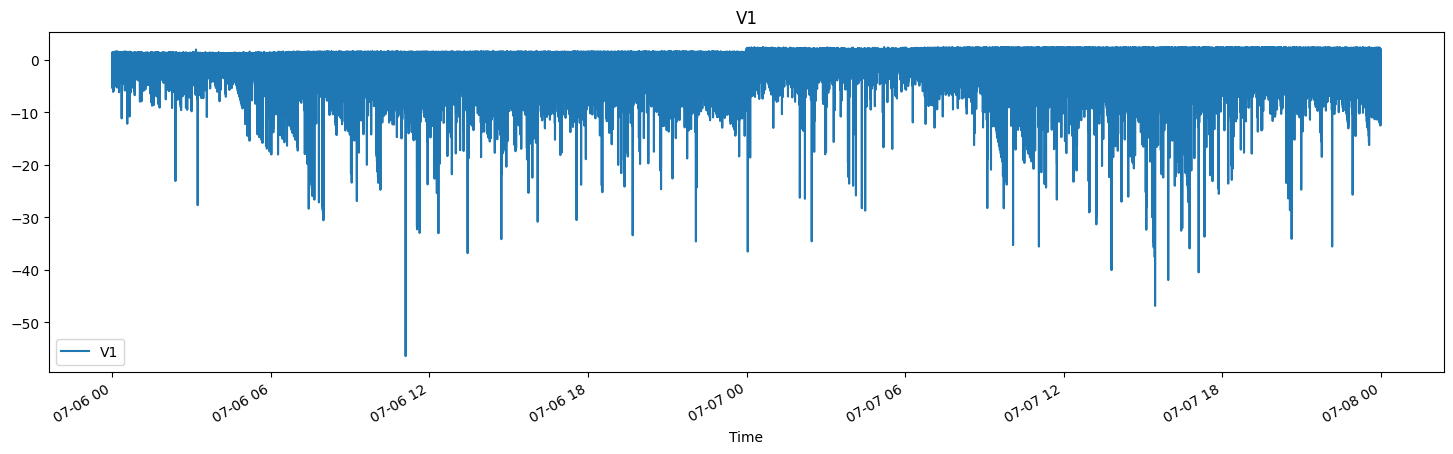

mean = 0.00, standard deviation = 1.96
Cutoff value = 1.96 , Lower cutoff value = 0.65


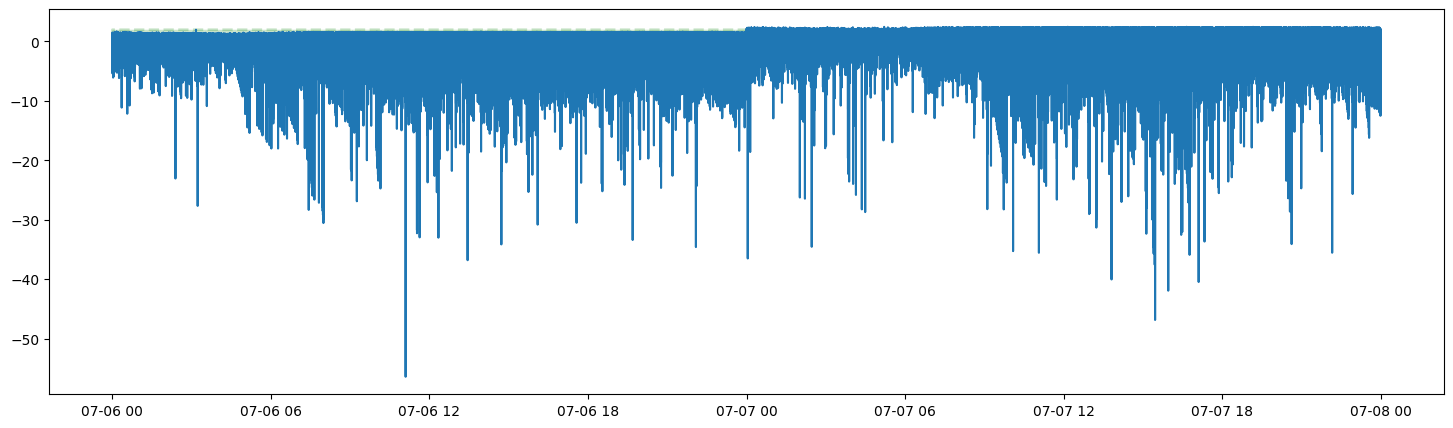

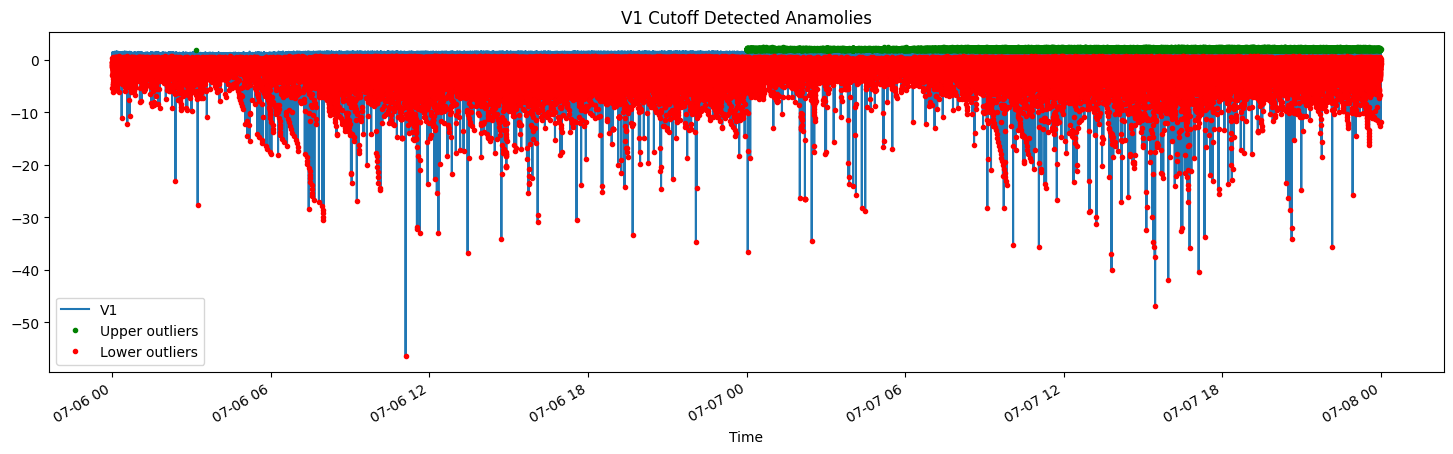

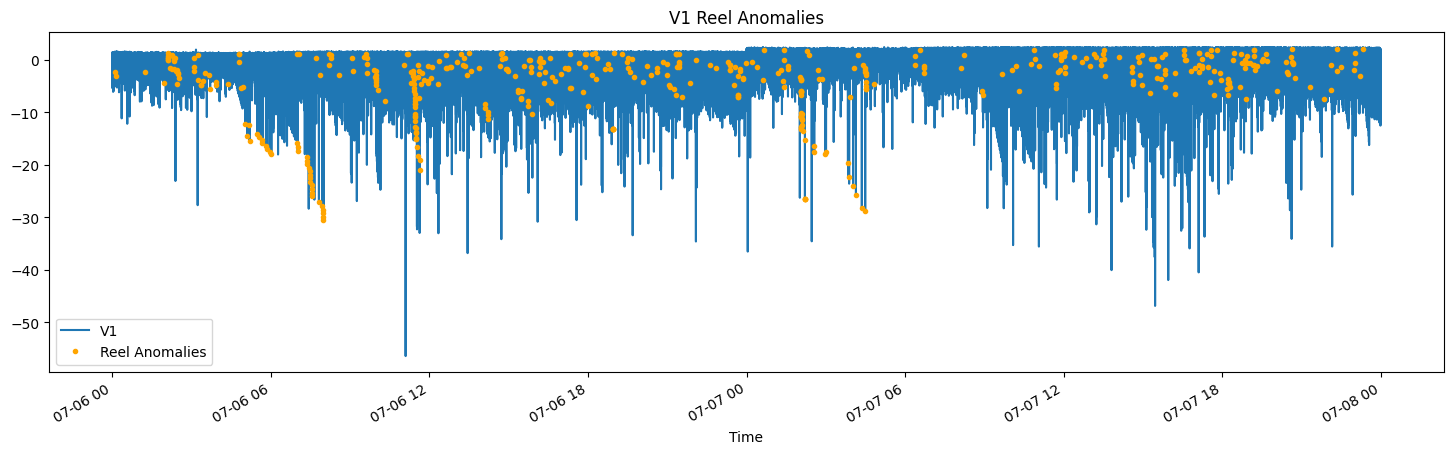

Anomalies: 492
Anomalies by Cutoff : 195837
% Anomalies detected: 91.06%
[1 0 1 ... 0 1 1]
              precision    recall  f1-score   support

           0       1.00      0.31      0.48    284315
           1       0.00      0.87      0.00       492

    accuracy                           0.31    284807
   macro avg       0.50      0.59      0.24    284807
weighted avg       1.00      0.31      0.48    284807

F1-score: 0.43%
Confusion matrix:
[[ 88904 195411]
 [    66    426]]
False Positive Rate: 99.78
False Negative Rate: 0.07


In [ ]:
cutoff_upper_threshold  = 1
cutoff_lower_thrershold = 3
cutoff_V1 =apply_cutoff_method('V1',V1,cutoff_upper_threshold,cutoff_lower_thrershold)
